Verificación de infección para cada persona:
       id          x          y estado  iteracion  puede_infectarse
0       1  -4.284576  23.522465      S          0             False
1       2  17.722347 -27.613335      S          0             False
2       3  18.766072   0.236887      S          0             False
3       4 -45.003215  17.017816      S          0             False
4       5  17.642410  37.080429      S          0             False
..    ...        ...        ...    ...        ...               ...
995   996   3.116197   4.356121      S          0             False
996   997 -29.453898   1.638608      S          0             False
997   998 -33.447382  48.354791      S          0             False
998   999  12.500567 -45.174480      S          0             False
999  1000 -16.877993  29.972272      S          0             False

[1000 rows x 6 columns]


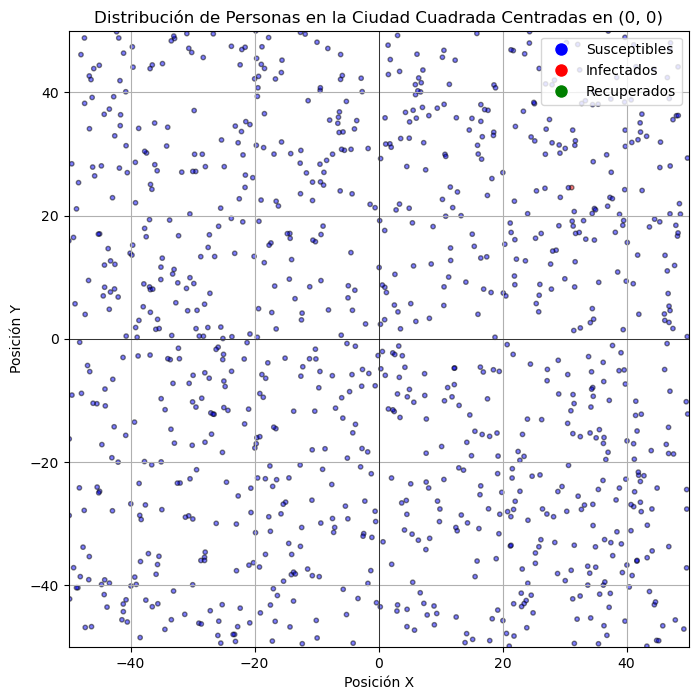

Personas que pueden infectarse:
      id         x          y estado  iteracion  puede_infectarse
272  273  31.13205  24.536846      I          0              True
703  704  30.60931  24.512483      S          0              True
Personas susceptibles que pueden infectarse:
      id         x          y estado  iteracion  puede_infectarse
703  704  30.60931  24.512483      S          0              True


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros
D = 100  # Tamaño de la ciudad
N = 1000  # Número total de personas
r = 0.6  # Radio de infección
tasa_recuperacion = 0.1  # Tasa de recuperación

# Inicializar posiciones aleatorias para N personas dentro de la ciudad centrada en (0, 0)
x_positions = np.random.uniform(-D / 2, D / 2, N)
y_positions = np.random.uniform(-D / 2, D / 2, N)

# Inicializar el estado de cada persona
S = N - 1  # Personas susceptibles
I = 1      # Personas infectadas
R = 0      # Personas recuperadas

# Crear una lista de estados, con 'S' para susceptibles y una 'I' para infectado inicial
estado_inicial = ['S'] * S + ['I'] + ['R'] * R
np.random.shuffle(estado_inicial)  # Mezclar estados para variar el orden

# Crear un dataframe para almacenar datos de cada persona
poblacion_df = pd.DataFrame({
    'id': range(1, N + 1),
    'x': x_positions,
    'y': y_positions,
    'estado': estado_inicial,
    'iteracion': 0  # Iteración inicial igual a 0 para todas las personas
})

# Función para calcular si una persona puede infectarse
def distancia_infectable(x1, y1, x2, y2, radio=r):
    distancia = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    return distancia < radio

# Mostrar si cada persona puede infectarse en función de su distancia a un infectado
def verificar_infeccion(poblacion, radio=r):
    resultado = []
    infectados = poblacion[poblacion['estado'] == 'I']
    
    # Verificar para cada persona si está dentro del radio de infección de al menos un infectado
    for idx, persona in poblacion.iterrows():
        es_infectable = any(distancia_infectable(persona['x'], persona['y'], inf['x'], inf['y'], radio) for _, inf in infectados.iterrows())
        resultado.append(es_infectable)
    
    poblacion['puede_infectarse'] = resultado
    return poblacion[['id', 'x', 'y', 'estado', 'iteracion', 'puede_infectarse']]

# DataFrame
print("Verificación de infección para cada persona:")
print(verificar_infeccion(poblacion_df))

# Graficar la ciudad cuadrada
def graficar_ciudad():
    plt.figure(figsize=(8, 8))
    color_map = {'S': 'blue', 'I': 'red', 'R': 'green'}
    colors = [color_map[estado] for estado in poblacion_df['estado']]
    
    plt.scatter(poblacion_df['x'], poblacion_df['y'], c=colors, s=10, edgecolor='k', alpha=0.5)

    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Susceptibles', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Infectados', markerfacecolor='red', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Recuperados', markerfacecolor='green', markersize=10)
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlim(-D / 2, D / 2)
    plt.ylim(-D / 2, D / 2)
    plt.title('Distribución de Personas en la Ciudad Cuadrada Centradas en (0, 0)')
    plt.xlabel('Posición X')
    plt.ylabel('Posición Y')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

# Llamar a la función
graficar_ciudad()

# DataFrame separado con solo los individuos que pueden infectarse
infectables_df = poblacion_df[poblacion_df['puede_infectarse'] == True]

# Mostrar el DataFrame
print("Personas que pueden infectarse:")
print(infectables_df)

# DataFrame con toda la población y su verificación de infección
poblacion_df = verificar_infeccion(poblacion_df)

# DataFrame separado con los individuos susceptibles que pueden infectarse
infectables_df = poblacion_df[(poblacion_df['puede_infectarse'] == True) & (poblacion_df['estado'] == 'S')]

# Mostrar el DataFrame
print("Personas susceptibles que pueden infectarse:")
print(infectables_df)